# Magnetic Bottle vs. Biconic Cusp

Av Lisa J. Nystad og Abera Sinnathamby

### Indroduksjon

Plasma er en av de fire tilstandene et stoff kan være i. I likhet med gass, består det av løsrevne partikler, men i plasma har mange av partiklene en elektrisk ladning. Disse partiklene er vanligvis elektroner, men de kan også være kationer og anioner. 
Mer av det som skiller plasma fra gass, er at det vil kunne lede strøm, og det lar seg påvirke av elektromagnetiske felter. Det er derfor man kan kontrollere og styre plasma eksternt ved anvendelse av elektriske og magnetiske felter. 

Noen former for anvending av plasma, vil være direkte i plasmabrennere, og i romfartøy hvor man benytter plasmamotorer. I slike motorer blir plasmaet akselerert av et pulserende magnetfelt til fremdrift. Man har også begynt å se mer på plasma i forhold til fusjonsreaktorer, men dette er fremdeles under utvikling.

I vårt nære verdensrom finner man partikler fra solen som er innfanget i jordens magnetfelt. Disse beveger seg frem og tilbake langs magnetfeltet, der utgangshastigheten bestemmer hvor langt de kommer. På den andre siden har vi nordlys som oppstår når partiklene som slynges ut fra sola, ikke fanges opp av magnetfeltet til jorda, men heller når helt frem til en av polene. 

Det vi ønsker å finne ut av i denne oppgaven er å se på forskjellene mellom det magnetiske feltet i en magnetisk flaske og en biconic cusp. Hvordan oppfører partiklene seg annerledes og hvorfor?

### Teori
#### Magnetic Bottle

I en magnetic bottle er det plassert to magnetiske speil nærme hverandre. Disse fungerer som en type magnetisk trap som brukes for å fange høy temperatur plasma ved å bruke magnetisk felt. For eksempel vil to parallelle ringer med en liten avstand mellom hverandre, og som fører lik strøm i samme retning produsere en magnetic bottle mellom hverandre. Partikler som beveger seg i nærheten av polene vil oppleve en magnetisk kraft som virker mot midten av feltet. Partikler med en gitt hastighet vil spinne rundt fra den ene siden av feltet til den andre og tilbake igjen. Dette er veldig likt hvordan jordens ikke-uniforme magnetfelt fanger ladde partikler fra solen i områder rundt jorden formet som smultringer. Disse områdene kalles Van Allen radiation belts. 

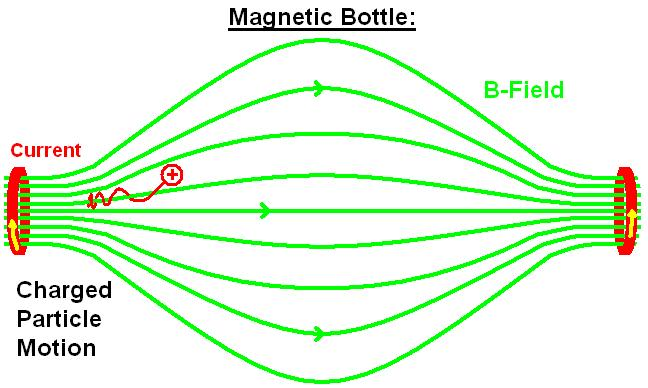

#### Biconic Cusp

En annen måte å fange partikler på er biconic cusp, som også kalles for “reverse magnetic bottle”. I likhet med magnetic bottle er en biconic cusp også en modell brukt til å se hvordan man kan kan fange plasma. Det magnetiske feltet i dette systemet er laget av to elektromagneter plassert nærme hverandre, disse elektromagnetene har poler som er vendt mot hverandre, men den ene er snudd om slik at i sentrum av det magnetiske feltet er det en nullpunkt, altså har vi et nullfelt. Det er bevegelsen til partiklene i denne type trap vi skal se nærmere på.

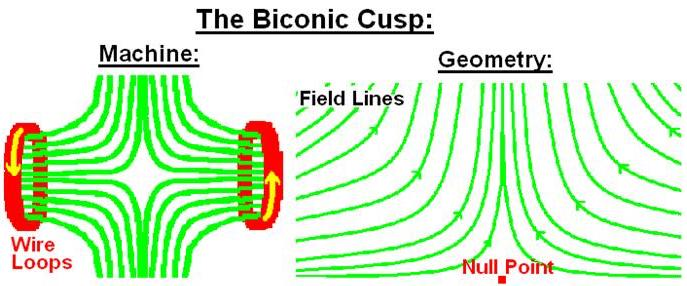

### Simulering av magnetisk felt

For å finne magnetfeltet i magnetic bottle setter vi opp to magnetiske dipoler. Dipolen er definert ved magnetisk dipolmoment: $\vec{\mu}$,og setter opp et felt på formen:
$$ \vec{B}\left(\vec{r}\right) = \frac{\mu_0}{4\pi} \left( \frac{3\vec{r}(\vec{\mu}\cdot\vec{r})}{r^5} - \frac{\vec{\mu}}{r^3} \right).  $$
Vi starter med et magnetisk dipolmoment i z-retnig, med styrke lik 10,000. Deretter finner vi en funksjon som kalkulerer det magnetiske feltet med en magnetisk dipol i posisjon (x,y,z) 



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dt = 1E-5
t = np.arange(0.0,3.0,dt)
m_p = 1.67E-27       # mass of proton: kg
m_e = 9.109e-31       # elektron massen
q = 1.602E-19        # charge of proton/electron: C
mu0 = np.pi * 4.0E-7 #mu_naught
mu = 10000.0 * np.array([0.0, 0.0, 1.0]) # magnetic moment that points

# arrays are allocated and filled with zeros

QoverM_1 = q*2/m_p*4
QoverM_2 = q/m_e




In [3]:
def B_bot(x,y,z):
    zdisp = 20.0 #displacement of the two magnetic dipoles away from zero (one is at z = +zdisp, the other at -zdisp)

    # point dipole A
    posA = np.array([0.0, 0.0, -zdisp]) #set the position of the first dipole
    rA = np.array([x,y,z]) - posA #find the difference between this position and the observation position
    rmagA = np.sqrt(sum(rA**2))

    B1A = 3*rA*np.dot(mu,rA) / (rmagA**5) #calculate the contribution of the first term to the magnetic field
    B2A = -1 * mu / (rmagA**3) #calculate the contribution of the second term

    # point dipole B
    posB = np.array([0.0, 0.0, zdisp])
    rB = np.array([x,y,z]) - posB
    rmagB = np.sqrt(sum(rB**2))
    B1B = 3*rB*np.dot(mu,rB) / (rmagB**5)
    B2B = -1 * mu / (rmagB**3)

    return ((mu0/(4.0*np.pi)) * (B1A + B2A + B1B + B2B)) #return the magnetic field due to the magnetic bottle.



For å finne magnetfeltet i biconic cusp snur vi nå retning på den ene dipolen:

$$ \vec{B}\left(\vec{r}\right) = \frac{\mu_0}{4\pi} \left( - \frac{3\vec{r}(\vec{\mu}\cdot\vec{r})}{r^5} + \frac{\vec{\mu}}{r^3} \right).  $$

In [4]:
def B_cusp(x,y,z):
    zdisp = 20.0 #displacement of the two magnetic dipoles away from zero (one is at z = +zdisp, the other at -zdisp)

    # point dipole A
    posA = np.array([0.0, 0.0, -zdisp]) #set the position of the first dipole
    rA = np.array([x,y,z]) - posA #find the difference between this position and the observation position
    rmagA = np.sqrt(sum(rA**2))
    #Flip one of the dipoles
    B1A = -0.03*rA*np.dot(mu,rA) / (rmagA**5) #calculate the contribution of the first term to the magnetic field
    B2A = 0.01 * mu / (rmagA**3) #calculate the contribution of the second term

    # point dipole B
    posB = np.array([0.0, 0.0, zdisp])
    rB = np.array([x,y,z]) - posB
    rmagB = np.sqrt(sum(rB**2))
    B1B = 0.03*rB*np.dot(mu,rB) / (rmagB**5)
    B2B = -0.01 * mu / (rmagB**3)

    return ((mu0/(4.0*np.pi)) * (B1A + B2A + B1B + B2B)) #return the magnetic field due to the magnetic bottle.

In [5]:
x = np.arange(-10.0, 10.0, .1) #create a grid of points from y = -10 to 10
y = np.arange(-10.0, 10.0, .1) #create a grid of points from y = -10 to 10
z = np.arange(-10.0, 10.0, .1) #create a grid of points from z = -10 to 10
Y, Z = np.meshgrid(y,z) #turn this into a mesh
ilen, jlen = np.shape(Y) #define the length of the dimensions, for use in iteration
Bf = np.zeros((ilen,jlen,3)) #set the points to 0
Bc = np.zeros((ilen,jlen,3)) #set the points to 0

for i in range(0, ilen): #iterate through the grid, setting each point equal to the magnetic field value there
    for j in range(0, jlen):
        Bf[i,j] = B_bot(0.0, Y[i,j], Z[i,j])
        Bc[i,j] = B_cusp(0.0, Y[i,j], Z[i,j])

Text(0.5,1,'Magnetic Field of Biconic Cusp')

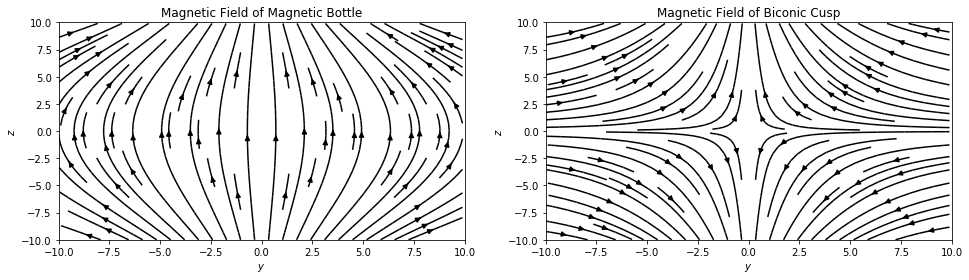

In [6]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.streamplot(Y,Z, Bf[:,:,1], Bf[:,:,2], color="black")
plt.xlim(-10.0,10.0)
plt.ylim(-10.0,10.0)
plt.xlabel("$y$")
plt.ylabel("$z$")
plt.title("Magnetic Field of Magnetic Bottle")
plt.subplot(1,2,2)
plt.streamplot(Y,Z, Bc[:,:,1], Bc[:,:,2], color="black")
plt.xlim(-10.0,10.0)
plt.ylim(-10.0,10.0)
plt.xlabel("$y$")
plt.ylabel("$z$")
plt.title("Magnetic Field of Biconic Cusp")


#### Simulering av partikkel bevegelse

Nå skal vi simulere en alpha partikkel og et elektron med initial hastighet i z-retning, som skal bevege seg gjennom det magnetiske feltet i magnetic bottle og biconic cusp.

Magnetic bottle:

Text(0.5,1,"Trajectory of Alpha Particle and electron in a 'Magnetic Bottle'")

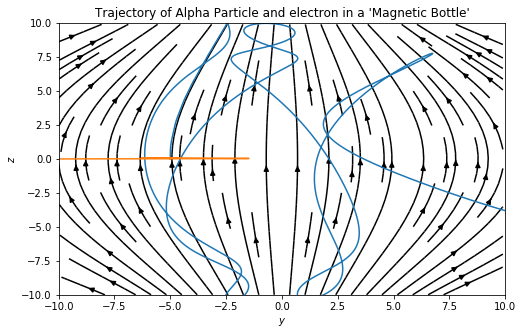

In [7]:
r_A = np.zeros((len(t), 3)) #create an array that will hold the position values
v_A = np.zeros((len(t), 3)) #create an array that will hold the velocity values

r_e = np.zeros((len(t), 3)) #create an array that will hold the position values
v_e = np.zeros((len(t), 3)) #create an array that will hold the velocity values

v_0 = 100.0 #set the initial velocity to 100 m/s
r_A[0,:] = np.array([0.0, -5.0, 0.0]) #initialize the position to y=-5, 5m above the lower dipole
v_A[0,:] = np.array([0.0, 0.0, v_0]) #initialize the velocity to be in the z-direction

r_e[0,:] = np.array([0.0, -5.0, 0.0]) #initialize the position to y=-5, 5m above the lower dipole
v_e[0,:] = np.array([0.0, 0.0, v_0]) #initialize the velocity to be in the z-direction

for it in np.arange(0, len(t)-1,1):
    B_A = B_bot(r_A[it,0], r_A[it, 1], r_A[it,2]) #input the current particle position into the B_bot function to get the magnetic field
    A_A = QoverM_1 * np.cross(v_A[it,:], B_A) #Calculate the magnetic force on the particle
    v_A[it+1] = v_A[it] + dt*A_A #Update the velocity of the particle based on this force
    r_A[it+1] = r_A[it] + dt*v_A[it] #Update the positon of the particle based on this velocity
    
    B_e = B_bot(r_e[it,0], r_e[it, 1], r_e[it,2]) #input the current particle position into the B_bot function to get the magnetic field
    A_e = QoverM_2 * np.cross(v_e[it,:], B_e) #Calculate the magnetic force on the particle
    v_e[it+1] = v_e[it] + dt*A_e #Update the velocity of the particle based on this force
    r_e[it+1] = r_e[it] + dt*v_e[it] #Update the positon of the particle based on this velocity

plt.figure(figsize=(8,5))
plt.streamplot(Y,Z, Bf[:,:,1], Bf[:,:,2], color="black")
plt.plot(r_A[:,1], r_A[:,2])
plt.plot(r_e[:,1], r_e[:,2])
plt.xlim(-10.0,10.0)
plt.ylim(-10.0,10.0)
plt.xlabel("$y$")
plt.ylabel("$z$")
plt.title("Trajectory of Alpha Particle and electron in a 'Magnetic Bottle'")

 Vi har valgt å bruke leapfrog metoden istedenfor Euler cromer i biconic cusp, ettersom vi er ute etter en mer nøyaktig tilnærming til partikkelbevegelsen. Partikkelen har periodiske bevegelser, og vi trenger å få små tidssteg som mulig for å få med hele svingningen. Dette får vi med leapfrog siden vi kan velge tidsstegene selv.

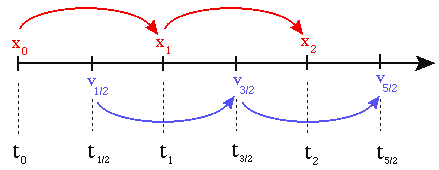

Når vi simulerer partikkel bevegelsen i en Biconic cusp, ser vi på tre ulike klasser for elektronet: Stable, Erratic og Transition. 
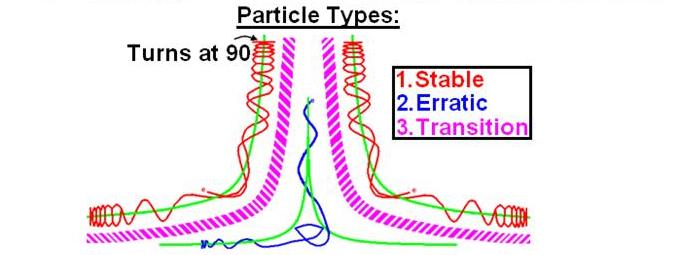

Biconic cusp:

Text(0.5,1,'Trajectory of Alpha Particle and electron in a Biconic cusp')

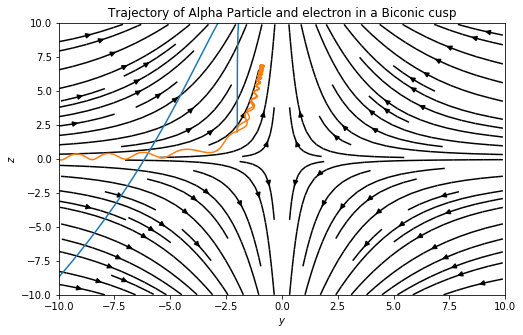

In [11]:
r_A = np.zeros((len(t), 3)) #create an array that will hold the position values
v_A = np.zeros((len(t), 3)) #create an array that will hold the velocity values

r_e = np.zeros((len(t), 3)) #create an array that will hold the position values
v_e = np.zeros((len(t), 3)) #create an array that will hold the velocity values

v_0 = 100.0 #set the initial velocity to 100 m/s
r_A[0,:] = np.array([0.0, -2.0, 2.0]) #initialize the position to y=-5, 5m above the lower dipole
v_A[0,:] = np.array([0.0, 0.0, v_0]) #initialize the velocity to be in the z-direction

r_e[0,:] = np.array([0.0, -2.0, 2.0]) #initialize the position to y=-5, 5m above the lower dipole
v_e[0,:] = np.array([0.0, 0.0, v_0]) #initialize the velocity to be in the z-direction

for it in np.arange(0, len(t)-1,1):
    B_A = B_cusp(r_A[it,0], r_A[it, 1], r_A[it,2]) #input the current particle position into the B_bot function to get the magnetic field
    A_A = QoverM_1 * np.cross(v_A[it,:], B_A) #Calculate the magnetic force on the particle
    v_A[it+1] = v_A[it] + dt/4*A_A #Update the velocity of the particle based on this force
    r_A[it+1] = r_A[it] + dt/4*v_A[it] #Update the positon of the particle based on this velocity
    
    B_e = B_cusp(r_e[it,0], r_e[it, 1], r_e[it,2]) #input the current particle position into the B_bot function to get the magnetic field
    A_e = QoverM_2 * np.cross(v_e[it,:], B_e) #Calculate the magnetic force on the particle
    v_e[it+1] = v_e[it] + dt/4*A_e #Update the velocity of the particle based on this force
    r_e[it+1] = r_e[it] + dt/4*v_e[it] #Update the positon of the particle based on this velocity

plt.figure(figsize=(8,5))
plt.streamplot(Y,Z, Bc[:,:,1], Bc[:,:,2], color="black")
plt.plot(r_A[:,1], r_A[:,2])
plt.plot(r_e[:,1], r_e[:,2])
plt.xlim(-10.0,10.0)
plt.ylim(-10.0,10.0)
plt.xlabel("$y$")
plt.ylabel("$z$")
plt.title("Trajectory of Alpha Particle and electron in a Biconic cusp")

Text(0.5,1,'Trajectory of Alpha Particle and electron in a Biconic cusp')

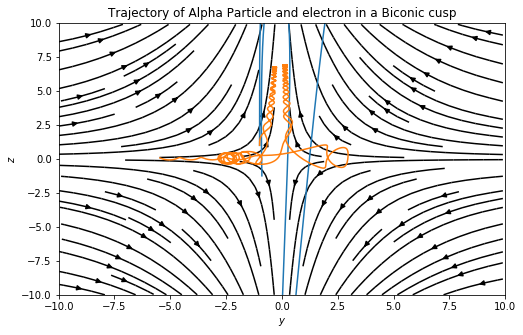

In [14]:
r_A = np.zeros((len(t), 3)) #create an array that will hold the position values
v_A = np.zeros((len(t), 3)) #create an array that will hold the velocity values

r_e = np.zeros((len(t), 3)) #create an array that will hold the position values
v_e = np.zeros((len(t), 3)) #create an array that will hold the velocity values

v_0 = 100.0 #set the initial velocity to 100 m/s
r_A[0,:] = np.array([0.0, -5.0, 0.0]) #initialize the position to y=-5, 5m above the lower dipole
v_A[0,:] = np.array([0.0, 0.0, v_0]) #initialize the velocity to be in the z-direction

r_e[0,:] = np.array([0.0, -5.0, 0.0]) #initialize the position to y=-5, 5m above the lower dipole
v_e[0,:] = np.array([0.0, 0.0, v_0]) #initialize the velocity to be in the z-direction

for it in np.arange(0, len(t)-1,1):
    B_A = B_cusp(r_A[it,0], r_A[it, 1], r_A[it,2]) #input the current particle position into the B_bot function to get the magnetic field
    A_A = QoverM_1 * np.cross(v_A[it,:], B_A) #Calculate the magnetic force on the particle
    v_A[it+1] = v_A[it] + dt/4*A_A #Update the velocity of the particle based on this force
    r_A[it+1] = r_A[it] + dt/4*v_A[it] #Update the positon of the particle based on this velocity
    
    B_e = B_cusp(r_e[it,0], r_e[it, 1], r_e[it,2]) #input the current particle position into the B_bot function to get the magnetic field
    A_e = QoverM_2 * np.cross(v_e[it,:], B_e) #Calculate the magnetic force on the particle
    v_e[it+1] = v_e[it] + dt/4*A_e #Update the velocity of the particle based on this force
    r_e[it+1] = r_e[it] + dt/4*v_e[it] #Update the positon of the particle based on this velocity

plt.figure(figsize=(8,5))
plt.streamplot(Y,Z, Bc[:,:,1], Bc[:,:,2], color="black")
plt.plot(r_A[:,1], r_A[:,2])
plt.plot(r_e[:,1], r_e[:,2])
plt.xlim(-10.0,10.0)
plt.ylim(-10.0,10.0)
plt.xlabel("$y$")
plt.ylabel("$z$")
plt.title("Trajectory of Alpha Particle and electron in a Biconic cusp")

In [ ]:
r_A = np.zeros((len(t), 3)) #create an array that will hold the position values
v_A = np.zeros((len(t), 3)) #create an array that will hold the velocity values

r_e = np.zeros((len(t), 3)) #create an array that will hold the position values
v_e = np.zeros((len(t), 3)) #create an array that will hold the velocity values

v_0 = 100.0 #set the initial velocity to 100 m/s
r_A[0,:] = np.array([0.0, -1.0, 1.0]) #initialize the position to y=-5, 5m above the lower dipole
v_A[0,:] = np.array([0.0, 0.0, v_0]) #initialize the velocity to be in the z-direction

r_e[0,:] = np.array([0.0, -1.0, 1.0]) #initialize the position to y=-5, 5m above the lower dipole
v_e[0,:] = np.array([0.0, 0.0, v_0]) #initialize the velocity to be in the z-direction

for it in np.arange(0, len(t)-1,1):
    B_A = B_cusp(r_A[it,0], r_A[it, 1], r_A[it,2]) #input the current particle position into the B_bot function to get the magnetic field
    A_A = QoverM_1 * np.cross(v_A[it,:], B_A) #Calculate the magnetic force on the particle
    v_A[it+1] = v_A[it] + dt/4*A_A #Update the velocity of the particle based on this force
    r_A[it+1] = r_A[it] + dt/4*v_A[it] #Update the positon of the particle based on this velocity
    
    B_e = B_cusp(r_e[it,0], r_e[it, 1], r_e[it,2]) #input the current particle position into the B_bot function to get the magnetic field
    A_e = QoverM_2 * np.cross(v_e[it,:], B_e) #Calculate the magnetic force on the particle
    v_e[it+1] = v_e[it] + dt/4*A_e #Update the velocity of the particle based on this force
    r_e[it+1] = r_e[it] + dt/4*v_e[it] #Update the positon of the particle based on this velocity

plt.figure(figsize=(8,5))
plt.streamplot(Y,Z, Bc[:,:,1], Bc[:,:,2], color="black")
plt.plot(r_A[:,1], r_A[:,2])
plt.plot(r_e[:,1], r_e[:,2])
plt.xlim(-10.0,10.0)
plt.ylim(-10.0,10.0)
plt.xlabel("$y$")
plt.ylabel("$z$")
plt.title("Trajectory of Alpha Particle and electron in a Biconic cusp")